# ML Lab Sheet 3 📑

### Name: Anish Agarwal

## Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Question - 1 => Using criterion = gini

## Importing DataSet

In [2]:
golf_data = pd.read_csv('https://raw.githubusercontent.com/anishaga/Machine-Learning/main/Lab%20Sheet%203/weather.csv')
golf_data
X = golf_data.iloc[:,:-1].values
y = golf_data.iloc[:,-1].values

In [3]:
print(X)

[['sunny' 'hot' 'high' False]
 ['sunny' 'hot' 'high' True]
 ['overcast' 'hot' 'high' False]
 ['rainy' 'mild' 'high' False]
 ['rainy' 'cool' 'normal' False]
 ['rainy' 'cool' 'normal' True]
 ['overcast' 'cool' 'normal' True]
 ['sunny' 'mild' 'high' False]
 ['sunny' 'cool' 'normal' False]
 ['rainy' 'mild' 'normal' False]
 ['sunny' 'mild' 'normal' True]
 ['overcast' 'mild' 'high' True]
 ['overcast' 'hot' 'normal' False]
 ['rainy' 'mild' 'high' True]]


In [4]:
print(y)

['no' 'no' 'yes' 'yes' 'yes' 'no' 'yes' 'no' 'yes' 'yes' 'yes' 'yes' 'yes'
 'no']


## OneHotEncoding

In [5]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers =[('encoder', OneHotEncoder(),[0,1,2,3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [6]:
print(X)

[[0. 0. 1. 0. 1. 0. 1. 0. 1. 0.]
 [0. 0. 1. 0. 1. 0. 1. 0. 0. 1.]
 [1. 0. 0. 0. 1. 0. 1. 0. 1. 0.]
 [0. 1. 0. 0. 0. 1. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 0. 0. 1. 1. 0.]
 [0. 1. 0. 1. 0. 0. 0. 1. 0. 1.]
 [1. 0. 0. 1. 0. 0. 0. 1. 0. 1.]
 [0. 0. 1. 0. 0. 1. 1. 0. 1. 0.]
 [0. 0. 1. 1. 0. 0. 0. 1. 1. 0.]
 [0. 1. 0. 0. 0. 1. 0. 1. 1. 0.]
 [0. 0. 1. 0. 0. 1. 0. 1. 0. 1.]
 [1. 0. 0. 0. 0. 1. 1. 0. 0. 1.]
 [1. 0. 0. 0. 1. 0. 0. 1. 1. 0.]
 [0. 1. 0. 0. 0. 1. 1. 0. 0. 1.]]


## Training Decision Tree On DataSet

In [7]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'gini', random_state = 0)
classifier.fit(X, y)

DecisionTreeClassifier(random_state=0)

## Printing Decision Tree

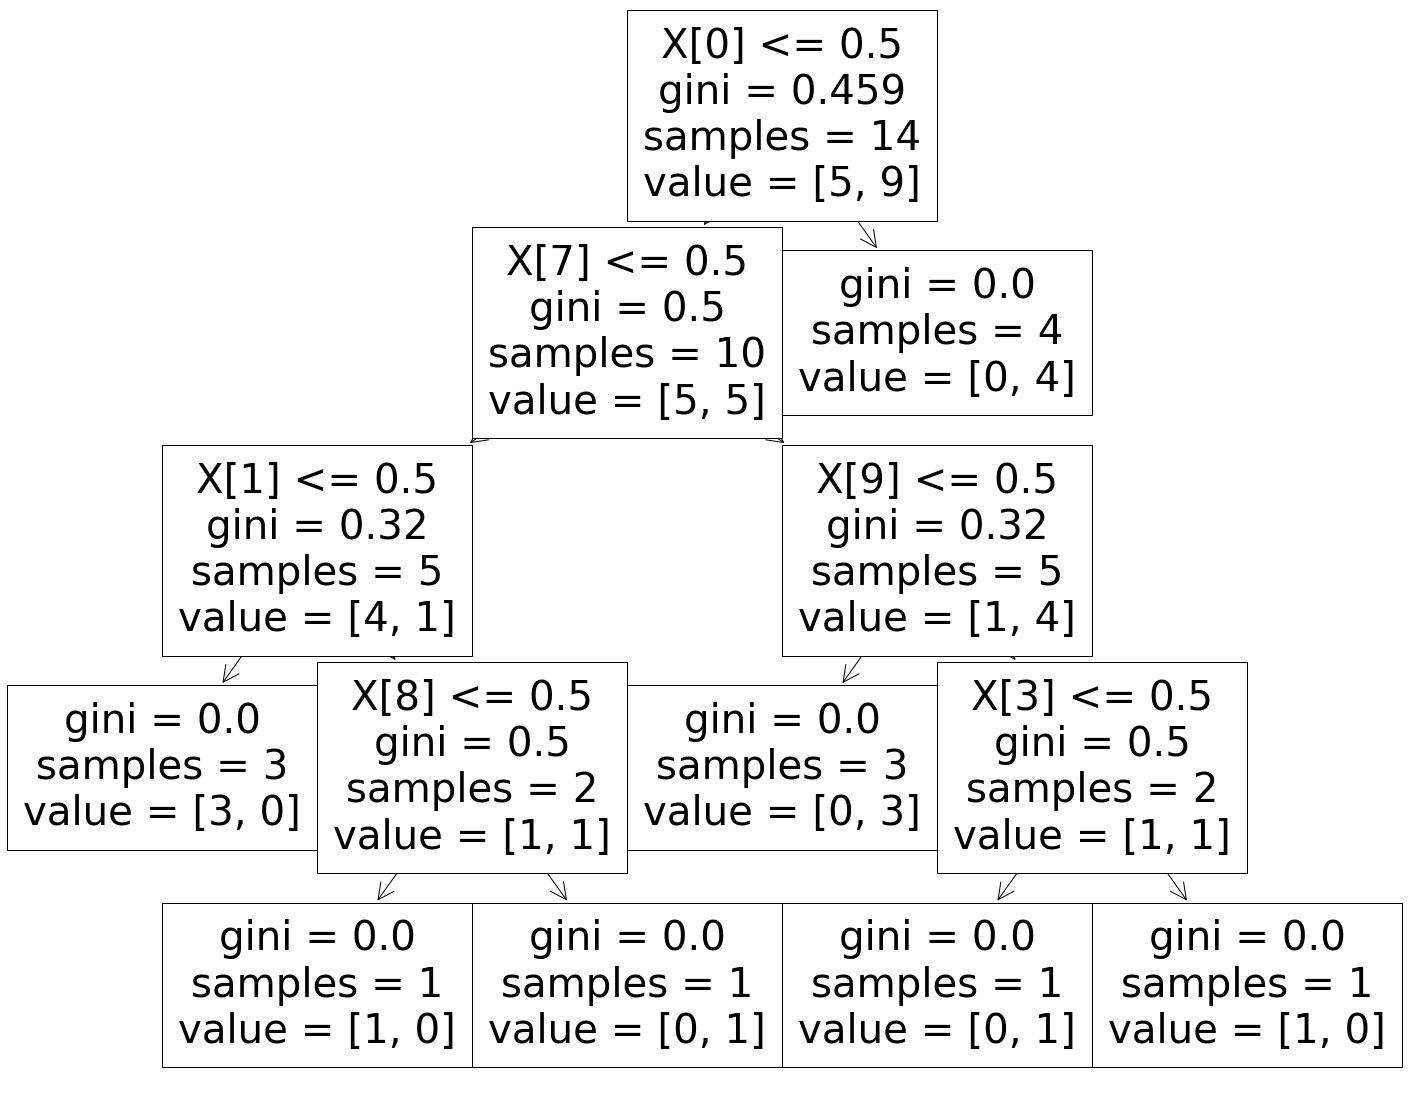

In [8]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
tree.plot_tree(classifier);

## Predicting New Data

In [9]:
x_pred = [['sunny','cool','normal',False],
          ['sunny','mild','normal',False]]
x_pred = np.array(ct.transform(x_pred))

In [10]:
y_new = classifier.predict(x_pred)
y_new

array(['yes', 'yes'], dtype=object)

## Question - 1 => Using criterion = entropy

## Importing DataSet

In [11]:
golf_data = pd.read_csv('weather.csv')
golf_data
X = golf_data.iloc[:,:-1].values
y = golf_data.iloc[:,-1].values

## OneHotEncoding

In [12]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers =[('encoder', OneHotEncoder(),[0,1,2,3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

## Training Decision Tree On DataSet

In [13]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X, y)

DecisionTreeClassifier(criterion='entropy', random_state=0)

## Printing Decision Tree

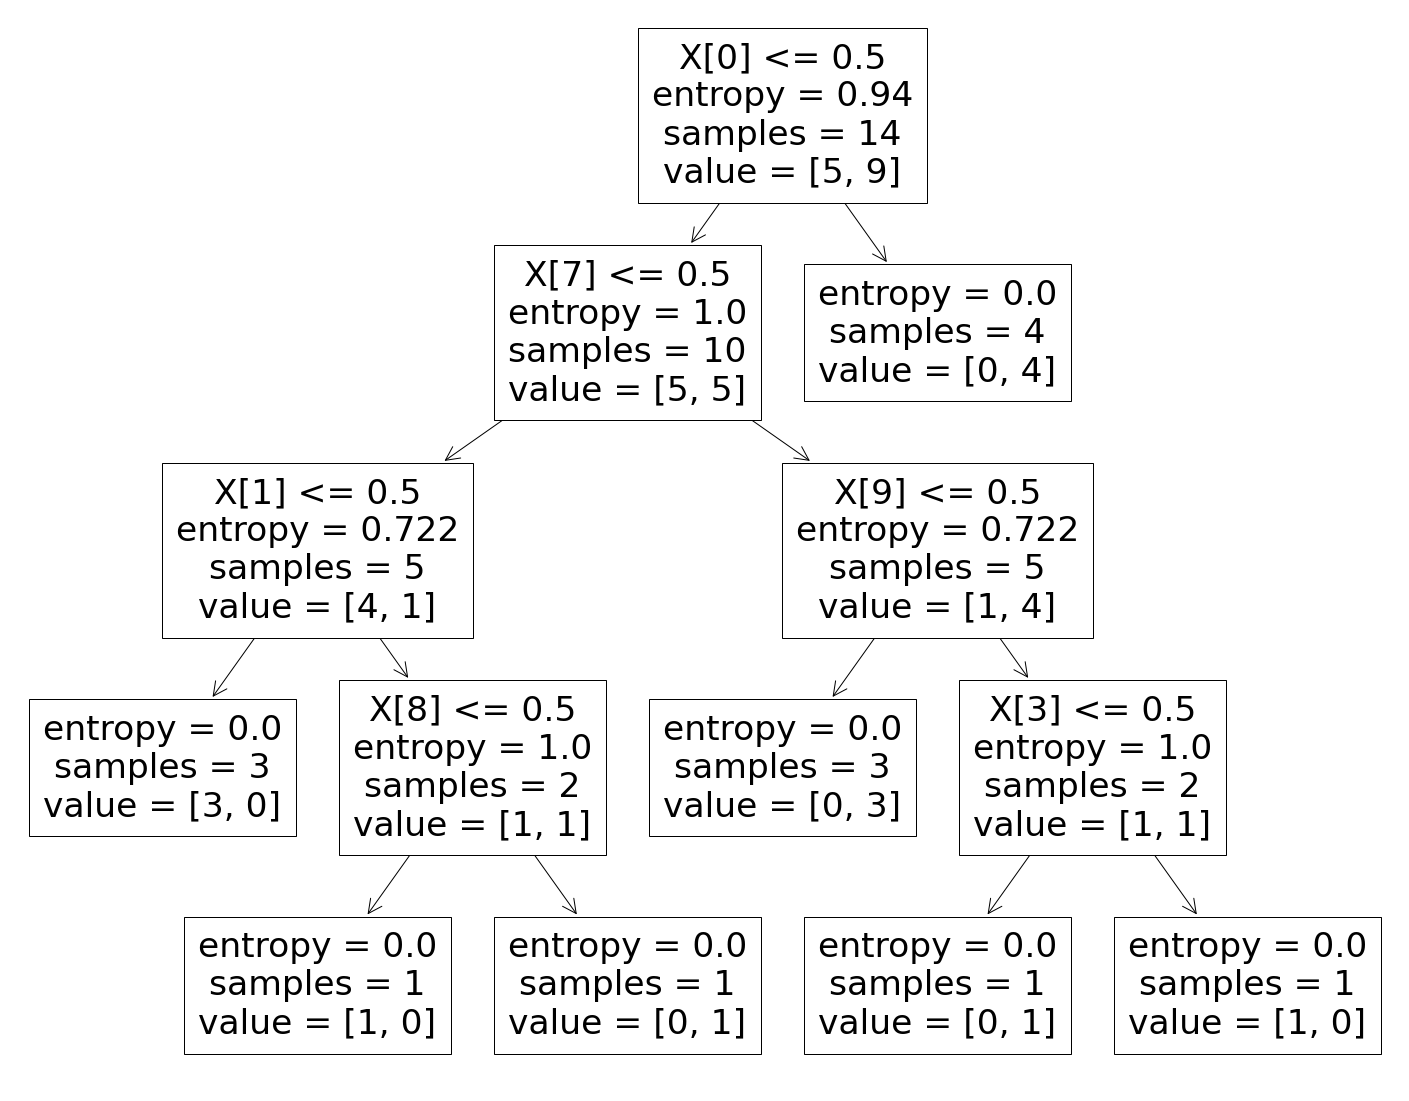

In [14]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
tree.plot_tree(classifier);

## Predicting New Data

In [15]:
x_pred = [['sunny','cool','normal',False],
          ['sunny','mild','normal',False]]
x_pred = np.array(ct.transform(x_pred))

In [16]:
y_new = classifier.predict(x_pred)
y_new

array(['yes', 'yes'], dtype=object)

## Question -2

## Importing The DataSet

In [17]:
dataset = pd.read_csv('https://raw.githubusercontent.com/anishaga/Machine-Learning/main/Lab%20Sheet%203/Data.csv')
dataset

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


In [18]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

## Splitting DataSet Into Training Set And Testing Set

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

## Training Multiple Regression Model On Training Set

In [20]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

## Predicting Test Set Results

In [21]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[483.87 483.2 ]
 [455.76 453.09]
 [478.1  483.94]
 ...
 [448.68 448.58]
 [436.43 436.29]
 [471.13 474.96]]


## Evaluating the Model Performance

In [22]:
from sklearn.metrics import r2_score
r2_score(y_pred, y_test)

0.9177257664039321

## Question - 3

## Importing The DataSet

In [23]:
dataset = pd.read_csv('https://raw.githubusercontent.com/anishaga/Machine-Learning/main/Lab%20Sheet%203/cancer.csv')
dataset

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
678,776715,3,1,1,1,3,2,1,1,1,2
679,841769,2,1,1,1,2,1,1,1,1,2
680,888820,5,10,10,3,7,3,8,10,2,4
681,897471,4,8,6,4,3,4,10,6,1,4


In [24]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

## Splitting The DataSet Into Training And Testing

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 0)

## Feature Scaling

In [26]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Training Decision Tree Model On Testing Data

In [27]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

## Printing Decision Tree

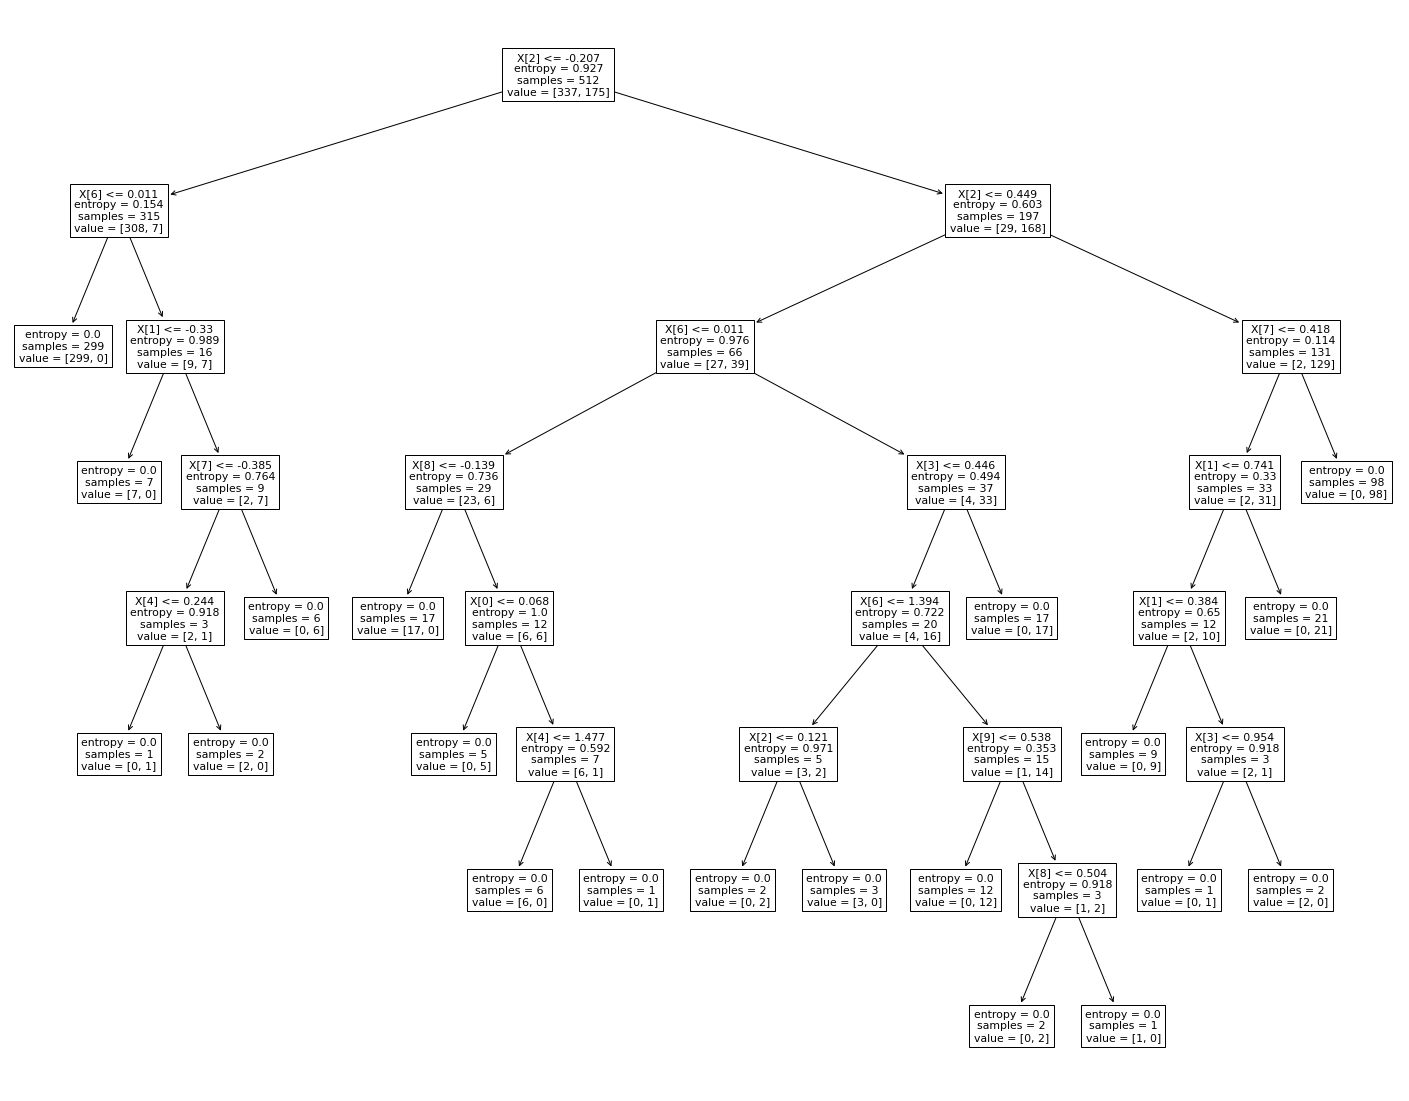

In [28]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
tree.plot_tree(classifier);

## Predicting Test Set Results

In [29]:
y_pred = classifier.predict(X_test)

## Making Confusion Matrix And Finding Accuracy Score

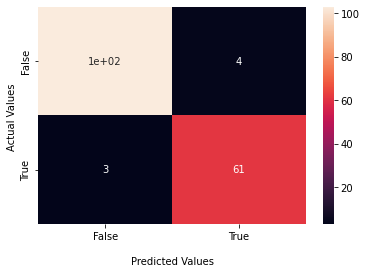

In [30]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)

ax = sns.heatmap(cm, annot=True)
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

## Finding Accuracy Score

In [31]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.9590643274853801